<a href="https://colab.research.google.com/github/j3rsey/section_project/blob/main/ai_04_section4_project_%EA%B3%BD%EC%83%81%ED%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import os
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


from nltk.corpus import stopwords 
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import keras
seed = 4353
import xgboost as xgb
import string
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score




from spacy.tokenizer import Tokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
data = pd.read_csv('Musical_instruments_reviews.csv')
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [3]:
data.columns = data.columns.str.lower()
data.columns

Index(['reviewerid', 'asin', 'reviewername', 'helpful', 'reviewtext',
       'overall', 'summary', 'unixreviewtime', 'reviewtime'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Overall ratings')

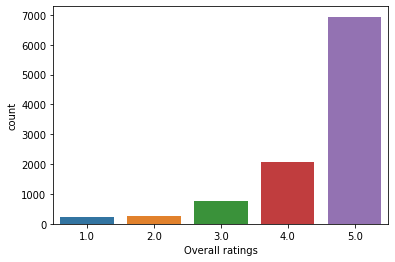

In [4]:
sns.countplot(data.overall)
plt.xlabel('Overall ratings')

In [5]:
data['sentiment'] = data.overall.replace({
    1:'negative',
    2:'negative',
    3:'neutral',
    4:'positive',
    5:'positive'
})

In [6]:
X_data = data['reviewtext'] + ' ' + data['summary']
y_data = data['sentiment']

In [7]:
X_data = X_data.astype(str)

In [8]:
X_data_df = pd.DataFrame(data=X_data)
X_data_df.columns = ['review']
X_data_df.head()

,review
0,"Not much to write about here, but it does exac..."
1,The product does exactly as it should and is q...
2,The primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...
4,This pop filter is great. It looks and perform...


In [9]:
string.punctuation
def final(X_data_full):
    
    def remove_punct(X_data_func):
        string1 = X_data_func.lower()
        translation_table = dict.fromkeys(map(ord, string.punctuation),' ')
        string2 = string1.translate(translation_table)
        return string2
    
    X_data_full_clear_punct = []
    for i in range(len(X_data_full)):
        test_data = remove_punct(X_data_full[i])
        X_data_full_clear_punct.append(test_data)
        
    def remove_stopwords(X_data_func):
        pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
        string2 = pattern.sub(' ', X_data_func)
        return string2
    
    X_data_full_clear_stopwords = []
    for i in range(len(X_data_full)):
        test_data = remove_stopwords(X_data_full[i])
        X_data_full_clear_stopwords.append(test_data)
        
    def tokenize_words(X_data_func):
        words = nltk.word_tokenize(X_data_func)
        return words
    
    X_data_full_tokenized_words = []
    for i in range(len(X_data_full)):
        test_data = tokenize_words(X_data_full[i])
        X_data_full_tokenized_words.append(test_data)
        
    lemmatizer = WordNetLemmatizer()
    def lemmatize_words(X_data_func):
        words = lemmatizer.lemmatize(X_data_func)
        return words
    
    X_data_full_lemmatized_words = []
    for i in range(len(X_data_full)):
        test_data = lemmatize_words(X_data_full[i])
        X_data_full_lemmatized_words.append(test_data)
        
    cv = CountVectorizer(max_features=1000)
    X_data_full_vector = cv.fit_transform(X_data_full_lemmatized_words).toarray()
    
    
    tfidf = TfidfTransformer()
    X_data_full_tfidf = tfidf.fit_transform(X_data_full_vector).toarray()
    
    return X_data_full_tfidf
    

In [10]:
data_X = final(X_data)
X_train, X_test, y_train, y_test = train_test_split(data_X, y_data, test_size=0.25, random_state= seed)

## Model Selection

### LSTM 

In [15]:
embedding_size=32
max_words=5000

model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=X_train.shape[1]))
model.add(LSTM(100))
model.add(Dense(units = 75 , activation = 'relu'))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu')) 
model.add(Dense(units = 3 , activation = 'softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_5 (Dense)              (None, 75)                7575      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                3800      
_________________________________________________________________
dense_7 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
y_train_dummies = pd.get_dummies(y_train).values
y_train_dummies.shape

(7695, 3)

In [18]:
model.fit(X_train, y_train_dummies, epochs=5, batch_size=32)

Epoch 1/5
241/241 [==============================] - 200s 821ms/step - loss: 0.4692 - accuracy: 0.8819
Epoch 2/5
241/241 [==============================] - 197s 819ms/step - loss: 0.4438 - accuracy: 0.8819
Epoch 3/5
241/241 [==============================] - 198s 823ms/step - loss: 0.4445 - accuracy: 0.8819
Epoch 4/5
241/241 [==============================] - 197s 816ms/step - loss: 0.4451 - accuracy: 0.8819
Epoch 5/5
241/241 [==============================] - 197s 816ms/step - loss: 0.4441 - accuracy: 0.8819


In [19]:
model.save('MusicalInstrumentReviews.h5')

In [20]:
y_test_dummies = pd.get_dummies(y_test).values
y_test_dummies.shape

(2566, 3)

In [21]:
from keras.models import load_model
model = load_model('MusicalInstrumentReviews.h5')
scores = model.evaluate(X_test, y_test_dummies)
LSTM_accuracy = scores[1]*100

print('Test accuracy: ', scores[1]*100, '%')

81/81 [==============================] - 16s 194ms/step - loss: 0.4696 - accuracy: 0.8714
Test accuracy:  87.13951706886292 %


### **XGBoost**

In [22]:
xgb_ = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed= seed)

xgb_.fit(X_train, y_train)
predictions = xgb_.predict(X_test)

In [23]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

xgb_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
xgb_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , xgb_accuracy , " %")
print("f1_score : " , xgb_f1)

              precision    recall  f1-score   support

    negative       0.56      0.11      0.19       122
     neutral       0.61      0.13      0.21       208
    positive       0.89      0.99      0.94      2236

    accuracy                           0.88      2566
   macro avg       0.69      0.41      0.45      2566
weighted avg       0.85      0.88      0.85      2566

[[  14    7  101]
 [   9   27  172]
 [   2   10 2224]]
Accuracy :  88.27  %
f1_score :  0.845


### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators= 10, random_state= seed)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [25]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

    negative       1.00      0.02      0.05       122
     neutral       0.45      0.02      0.05       208
    positive       0.87      1.00      0.93      2236

    accuracy                           0.87      2566
   macro avg       0.78      0.35      0.34      2566
weighted avg       0.85      0.87      0.82      2566

[[   3    2  117]
 [   0    5  203]
 [   0    4 2232]]
Accuracy :  87.3  %
f1_score :  0.818


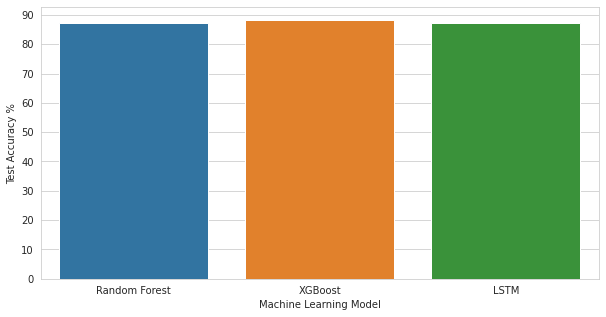

In [26]:
model = ['Random Forest', 'XGBoost', 'LSTM']
acc = [rfc_accuracy, xgb_accuracy, LSTM_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Test Accuracy %")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model, y= acc)
plt.show()

###Visualization

In [27]:
data2 = data.drop(columns = ['reviewerid', 'asin', 'reviewername', 'unixreviewtime', 'reviewtime', 'helpful', 'sentiment'])
data2

,reviewtext,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.
...,...,...,...
10256,"Great, just as expected. Thank to all.",5.0,Five Stars
10257,I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom..."
10258,I have tried coated strings in the past ( incl...,4.0,Good for coated.
10259,"Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made


In [28]:
data2.isna().sum()

reviewtext    7
overall       0
summary       0
dtype: int64

In [29]:
data2 = data2.dropna(axis= 0)

In [30]:
data2['review'] = data2['reviewtext'] + ' ' + data2['summary']
del data2['reviewtext']
del data2['summary']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [32]:
result = []
stop_words = stopwords.words('english')

for doc in tokenizer.pipe(data2['review']):
   
    low_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc if re.sub(r"[^a-z0-9]", "",token.text.lower()) not in stop_words]
    result.append(low_tokens)

data2['review'] = result[:]
data2['review']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0        [much, write, exactly, supposed, filters, pop,...
1        [product, exactly, quite, affordablei, realize...
2        [primary, job, device, block, breath, would, o...
3        [nice, windscreen, protects, mxl, mic, prevent...
4        [pop, filter, great, looks, performs, like, st...
                               ...                        
10256              [great, expected, , thank, five, stars]
10257    [ive, thinking, trying, nanoweb, strings, bit,...
10258    [tried, coated, strings, past, , including, el...
10259    [well, made, elixir, developed, taylor, guitar...
10260    [strings, really, quite, good, wouldnt, call, ...
Name: review, Length: 10254, dtype: object

In [33]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

data2['polarity'] = data2['review'].apply(lambda x: getPolarity(' '.join(x))) # join함수 를 통해 리스트를 문자열로 바꿔서 에러해결
data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,overall,review,polarity
0,5.0,"[much, write, exactly, supposed, filters, pop,...",0.400000
1,5.0,"[product, exactly, quite, affordablei, realize...",0.014286
2,5.0,"[primary, job, device, block, breath, would, o...",0.167500
3,5.0,"[nice, windscreen, protects, mxl, mic, prevent...",0.425000
4,5.0,"[pop, filter, great, looks, performs, like, st...",0.800000
...,...,...,...
10256,5.0,"[great, expected, , thank, five, stars]",0.350000
10257,5.0,"[ive, thinking, trying, nanoweb, strings, bit,...",0.179718
10258,4.0,"[tried, coated, strings, past, , including, el...",0.247449
10259,4.0,"[well, made, elixir, developed, taylor, guitar...",0.162662


In [34]:
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'

data2['analysis'] = data2['polarity'].apply(getAnalysis)
data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,overall,review,polarity,analysis
0,5.0,"[much, write, exactly, supposed, filters, pop,...",0.400000,Positive
1,5.0,"[product, exactly, quite, affordablei, realize...",0.014286,Positive
2,5.0,"[primary, job, device, block, breath, would, o...",0.167500,Positive
3,5.0,"[nice, windscreen, protects, mxl, mic, prevent...",0.425000,Positive
4,5.0,"[pop, filter, great, looks, performs, like, st...",0.800000,Positive
...,...,...,...,...
10256,5.0,"[great, expected, , thank, five, stars]",0.350000,Positive
10257,5.0,"[ive, thinking, trying, nanoweb, strings, bit,...",0.179718,Positive
10258,4.0,"[tried, coated, strings, past, , including, el...",0.247449,Positive
10259,4.0,"[well, made, elixir, developed, taylor, guitar...",0.162662,Positive


In [35]:
positive_data2 = data2[(data2['analysis']=='Positive')]
positive_data2

,overall,review,polarity,analysis
0,5.0,"[much, write, exactly, supposed, filters, pop,...",0.400000,Positive
1,5.0,"[product, exactly, quite, affordablei, realize...",0.014286,Positive
2,5.0,"[primary, job, device, block, breath, would, o...",0.167500,Positive
3,5.0,"[nice, windscreen, protects, mxl, mic, prevent...",0.425000,Positive
4,5.0,"[pop, filter, great, looks, performs, like, st...",0.800000,Positive
...,...,...,...,...
10256,5.0,"[great, expected, , thank, five, stars]",0.350000,Positive
10257,5.0,"[ive, thinking, trying, nanoweb, strings, bit,...",0.179718,Positive
10258,4.0,"[tried, coated, strings, past, , including, el...",0.247449,Positive
10259,4.0,"[well, made, elixir, developed, taylor, guitar...",0.162662,Positive


In [36]:
word_counts = Counter()
positive_data2['review'].apply(lambda x: word_counts.update(x))
count = word_counts.most_common()
count

[('', 17920),
 ('great', 5856),
 ('guitar', 5648),
 ('good', 4795),
 ('one', 4268),
 ('like', 3838),
 ('sound', 3695),
 ('use', 3693),
 ('strings', 3649),
 ('well', 3083),
 ('pedal', 2719),
 ('price', 2597),
 ('get', 2582),
 ('would', 2259),
 ('really', 2257),
 ('works', 2202),
 ('nice', 2194),
 ('little', 2103),
 ('amp', 2082),
 ('dont', 1973),
 ('much', 1952),
 ('quality', 1927),
 ('ive', 1802),
 ('better', 1757),
 ('used', 1702),
 ('also', 1665),
 ('easy', 1572),
 ('im', 1560),
 ('tone', 1538),
 ('strap', 1492),
 ('time', 1463),
 ('stand', 1449),
 ('picks', 1396),
 ('using', 1380),
 ('bought', 1364),
 ('best', 1343),
 ('tuner', 1318),
 ('mic', 1316),
 ('need', 1316),
 ('guitars', 1297),
 ('play', 1261),
 ('even', 1260),
 ('work', 1256),
 ('product', 1251),
 ('buy', 1213),
 ('string', 1200),
 ('love', 1169),
 ('playing', 1165),
 ('cable', 1161),
 ('want', 1111),
 ('sounds', 1106),
 ('made', 1095),
 ('pedals', 1086),
 ('way', 1081),
 ('acoustic', 1062),
 ('still', 1047),
 ('right', 10

In [37]:
word_counts_df = pd.DataFrame(word_counts.most_common(30))
word_counts_df.columns = ['word', 'counts']

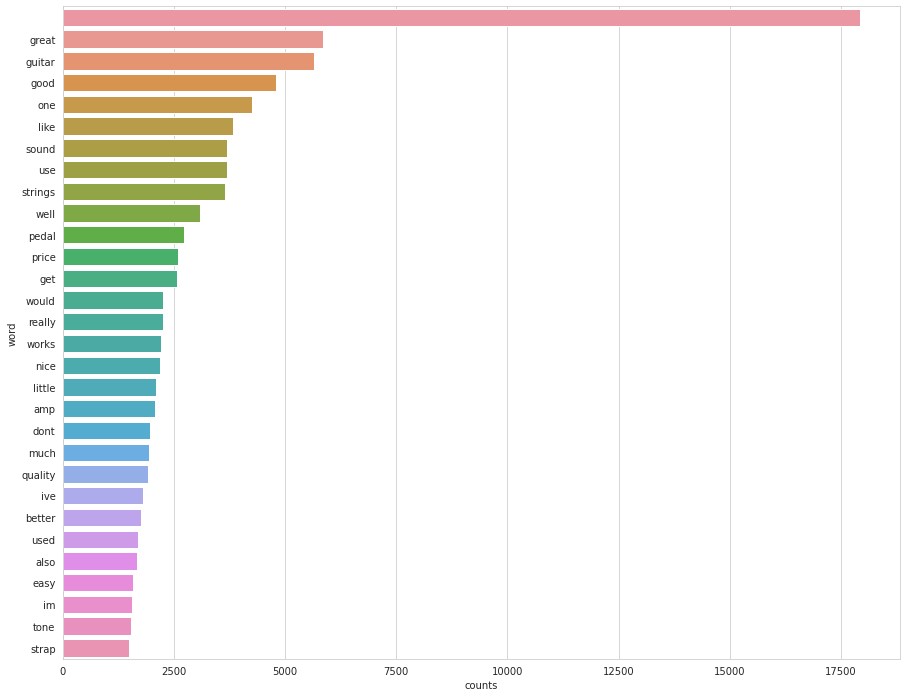

In [38]:
plt.figure(figsize =(15,12))
sns.barplot(x = 'counts', y = 'word', data = word_counts_df)

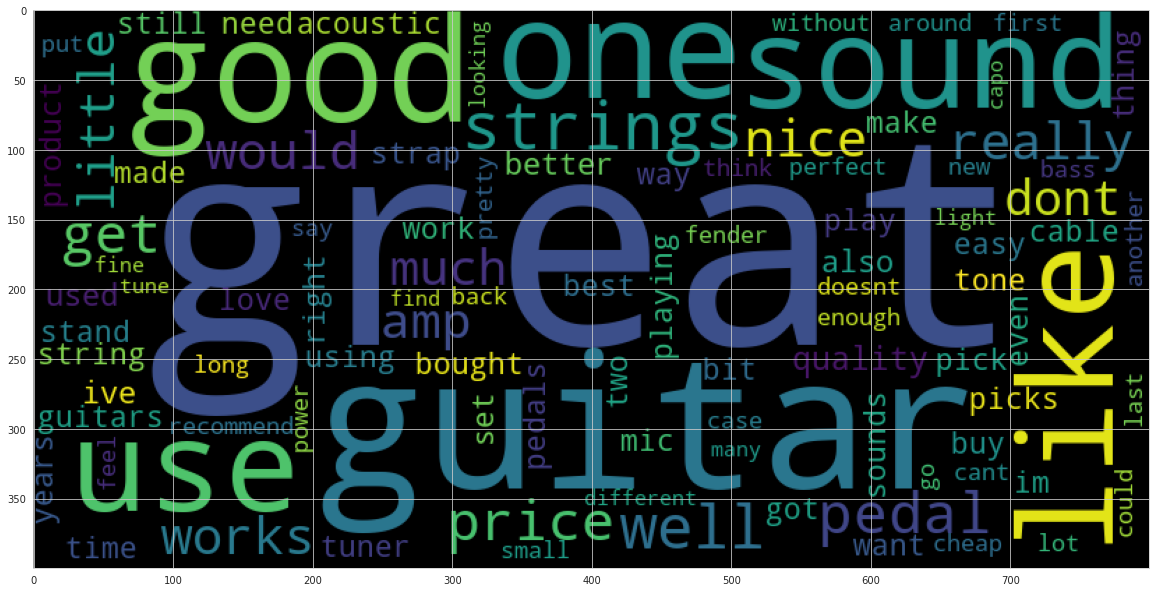

In [39]:
wordcloud = WordCloud(min_font_size = 3, max_words = 100, width = 800,
                      height = 400).generate_from_frequencies(word_counts)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud)

In [40]:
negative_data2 = data2[(data2['analysis']=='Negative')]
negative_data2

,overall,review,polarity,analysis
12,3.0,"[use, using, large, sustaining, pedal, playing...",-0.191071,Negative
28,4.0,"[hosa, xlr, cables, affordable, heavily, madei...",-0.233929,Negative
76,3.0,"[one, end, loose, tightened, keeps, coming, lo...",-0.010769,Negative
79,4.0,"[complaint, size, fault, buy, least, 15, foot,...",-0.300000,Negative
89,1.0,"[im, procheapo, hated, thing, theyre, noisy, c...",-0.433333,Negative
...,...,...,...,...
10090,5.0,"[classical, guitar, stand, metal, short, like,...",-0.081944,Negative
10170,5.0,"[remember, little, sticky, gummi, hand, things...",-0.057500,Negative
10177,5.0,"[added, december, 5has, yet, fall, fiddle, scr...",-0.069188,Negative
10178,2.0,"[larger, ones, sometimes, neck, snap, thought,...",-0.058333,Negative


In [41]:
word_counts = Counter()
negative_data2['review'].apply(lambda x: word_counts.update(x))
count = word_counts.most_common()
count

[('', 705),
 ('guitar', 257),
 ('one', 213),
 ('like', 184),
 ('use', 165),
 ('little', 158),
 ('well', 142),
 ('get', 133),
 ('dont', 129),
 ('strap', 119),
 ('stand', 114),
 ('would', 107),
 ('strings', 103),
 ('works', 99),
 ('picks', 89),
 ('bad', 88),
 ('pick', 75),
 ('really', 74),
 ('product', 73),
 ('used', 73),
 ('got', 73),
 ('hard', 70),
 ('quality', 69),
 ('go', 68),
 ('ive', 67),
 ('back', 67),
 ('bought', 67),
 ('thing', 66),
 ('much', 66),
 ('buy', 65),
 ('im', 65),
 ('work', 64),
 ('time', 64),
 ('good', 62),
 ('small', 61),
 ('mic', 60),
 ('cant', 57),
 ('want', 57),
 ('using', 56),
 ('put', 55),
 ('doesnt', 55),
 ('price', 53),
 ('bass', 53),
 ('wrong', 51),
 ('way', 51),
 ('long', 51),
 ('even', 49),
 ('could', 49),
 ('pedal', 48),
 ('bit', 48),
 ('need', 48),
 ('two', 48),
 ('around', 47),
 ('know', 47),
 ('also', 47),
 ('ill', 46),
 ('another', 46),
 ('playing', 45),
 ('still', 45),
 ('never', 44),
 ('made', 44),
 ('cable', 43),
 ('guitars', 43),
 ('enough', 43),
 

In [42]:
word_counts_df = pd.DataFrame(word_counts.most_common(30))
word_counts_df.columns = ['word', 'counts']

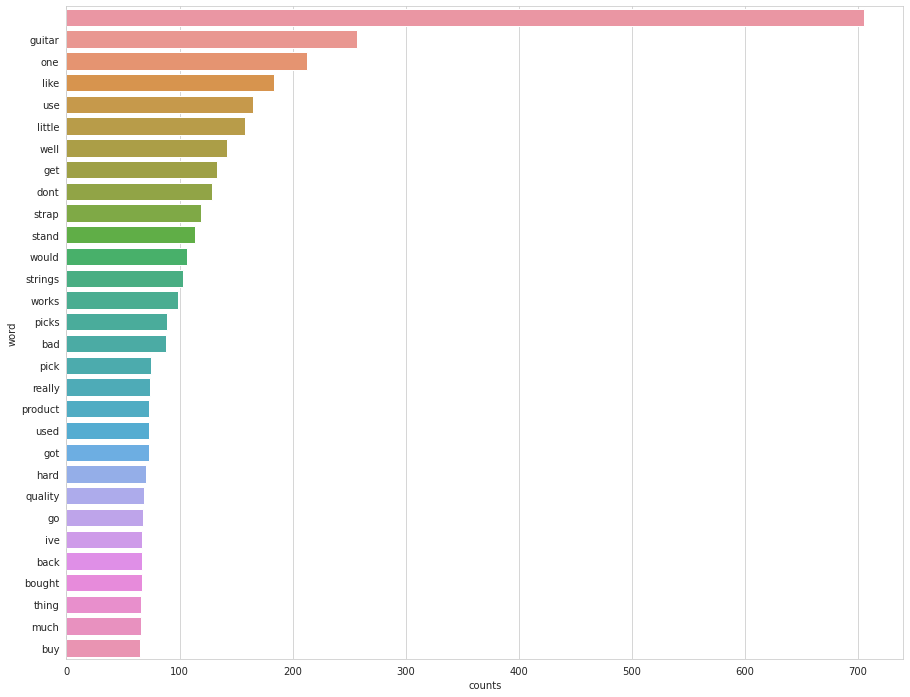

In [43]:
plt.figure(figsize =(15,12))
sns.barplot(x = 'counts', y = 'word', data = word_counts_df)

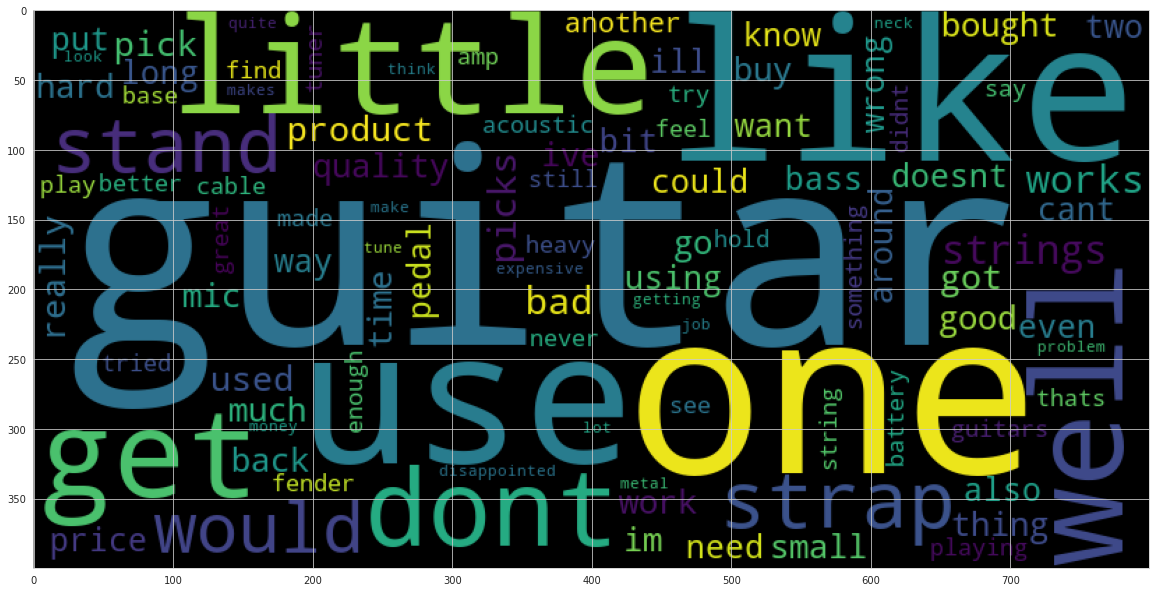

In [44]:
wordcloud = WordCloud(min_font_size = 3, max_words = 100, width = 800,
                      height = 400).generate_from_frequencies(word_counts)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud)